In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import boto3
import sagemaker
from sagemaker import get_execution_role
import io
import pickle
np.random.seed(1)

In [2]:
data_length = 20
prediction_length = 5

In [3]:
print("3")

3


In [4]:
prefix = "bit-coin-forecast"

sagemaker_session = sagemaker.Session()
role = get_execution_role()
bucket = "bit-coin-data"

s3_data_path = f"{bucket}/{prefix}/data"
s3_output_path = f"{bucket}/{prefix}/output"

In [5]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket = "bit-coin-data",Key = "bit_data.csv")
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [7]:
df["Date"]=df["Date"].apply(lambda x: pd.Timestamp(x))

In [8]:
time_series=[]
i=0
while(i<len(df)):
    if i+data_length<len(df):
        time_series.append(pd.Series(data=list(df["Close"])[i:i+data_length],index=list(df["Date"])[i:i+data_length]))
    i+=1

In [9]:
time_series_training = []
for ts in time_series:
    time_series_training.append(ts[:-prediction_length])

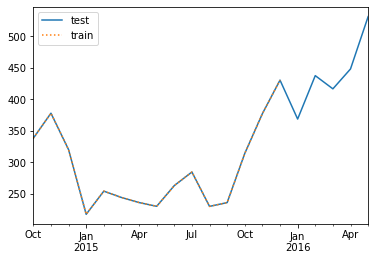

In [10]:
time_series[0].plot(label="test")
time_series_training[0].plot(label="train", ls=":")
plt.legend()
plt.show()

In [11]:
with open('ground_truth.pkl', 'wb') as file:
      pickle.dump(time_series, file)


In [12]:
with open('train.pkl', 'wb') as file:
      pickle.dump(time_series_training, file)

In [13]:
s3.upload_file("ground_truth.pkl", bucket, prefix + "/data/output/" + "ground_truth.pkl")

In [14]:
s3.upload_file("train.pkl", bucket, prefix + "/data/output/" + "train.pkl")